In [ ]:
from qiskit import *
from qiskit.visualization import plot_distribution

The *Bernstein-Vazirani Algorithm* is a quantum algorithm that solves the following problem: given a function $f$ that takes as input a string of bits $x$ and returns either $0$ or $1$, find the string $s$ such that $f(x) = s \cdot x \pmod{2}$ for all $x$. In other words, find the hidden string $s$ that determines how $f$ evaluates strings of bits. Take an example of a binary string $011001$ and make a classical computer guess it by brute-forcing every combination of 0's and 1's in a 5-digit format.

Starting from the first or last digit, the computer after necessarily 1 or 2 tries, gets one digit right. Then, it moves to the next digit and tries to guess it. If it gets it right, it moves to the next digit and so on. If it gets it wrong, it goes back to the previous digit and tries to guess it again. This is a classical approach to the problem. Think of a computer playing Wordle, but with **2** possibilities instead of 26.

Meanwhile, a Quantumcomputer can accomplish this task in **one try,** completely independent of the number of combinations of a problem presented Let's see how:

In [5]:
secret_number = '01111000010' # Feel free to change this to test it out for yourself :)

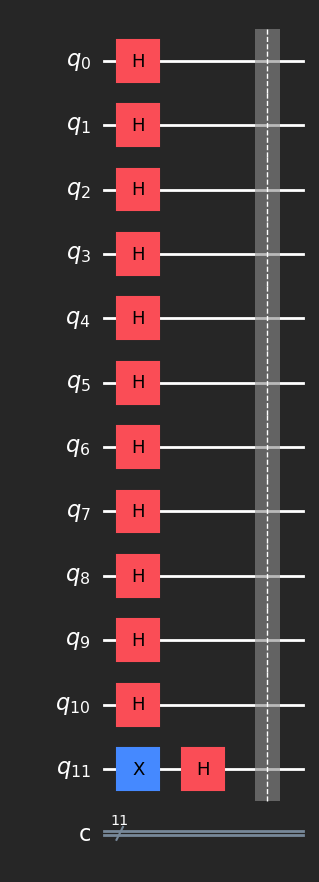

In [7]:
circuit = QuantumCircuit(len(secret_number) + 1, len(secret_number))
circuit.h(range(len(secret_number))) # On all but last qubits
circuit.x(len(secret_number)) 
circuit.h(len(secret_number)) # On last qubit

circuit.barrier()

circuit.draw(output = 'mpl', style = 'iqx-dark')  

This intializes almost all qubits to $\ket{+}$, but the **last** to $\ket{-}$. Next, we'll introduce $\mathrm{CNOT}$-Gates to every qubit in the string 'containing' a **1:**

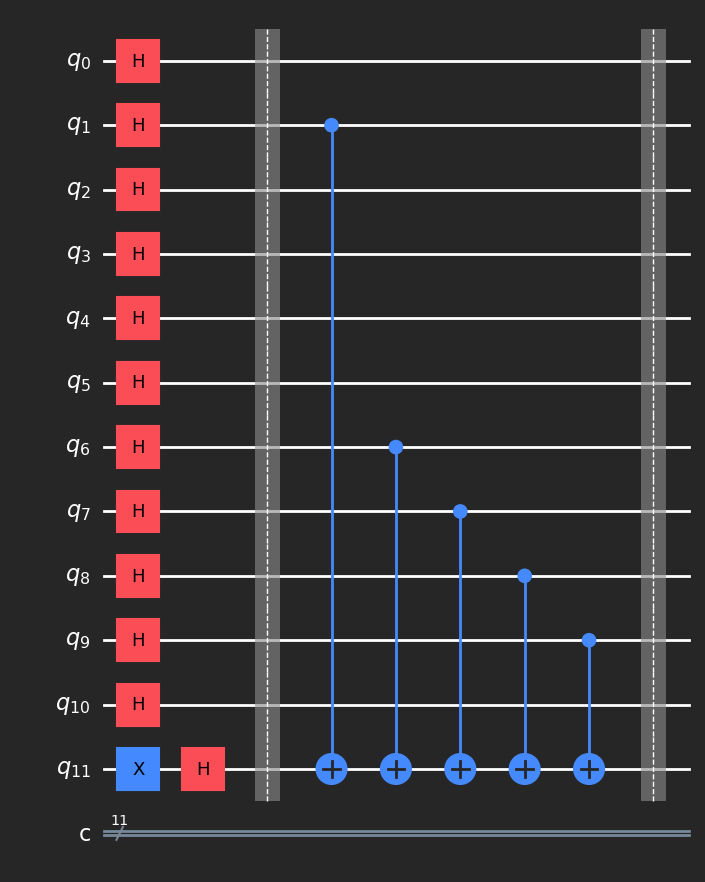

In [8]:
for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number)) # Applies CNOT gates on qubits ii (those 'containing' 1) as control and the last qubit as the target

circuit.barrier()

circuit.draw(output = 'mpl', style = 'iqx-dark')

Finally, we apply Hadamard gates and measurement operations to all qubits but the last one:

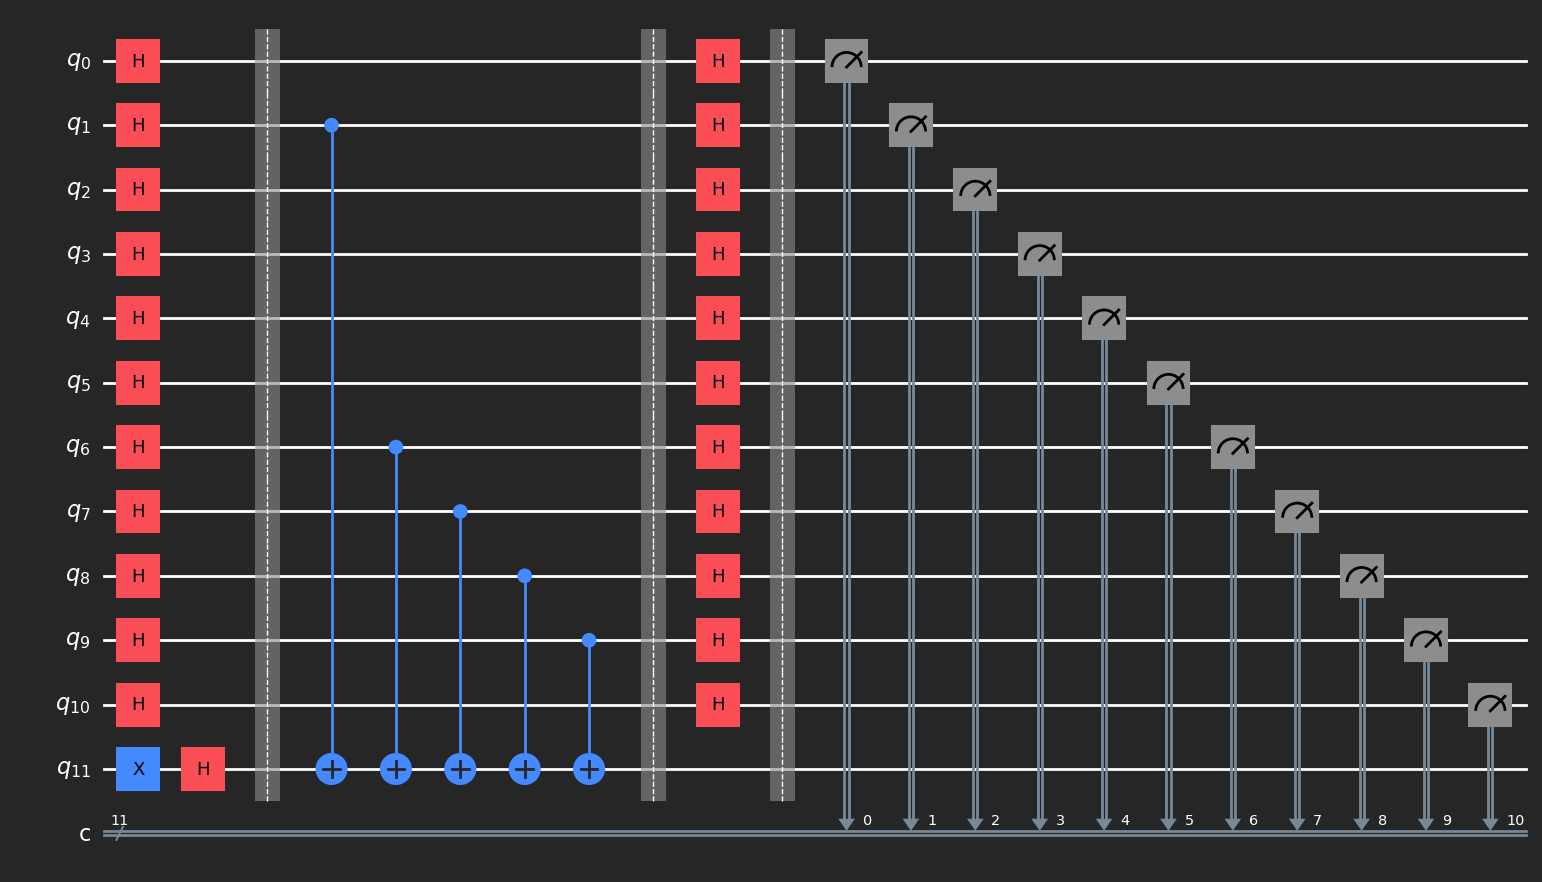

In [9]:
circuit.h(range(len(secret_number)))
circuit.barrier()

circuit.measure(range(len(secret_number)), range(len(secret_number)))
circuit.draw(output = 'mpl', style = 'iqx-dark')

# Simulation and Results:

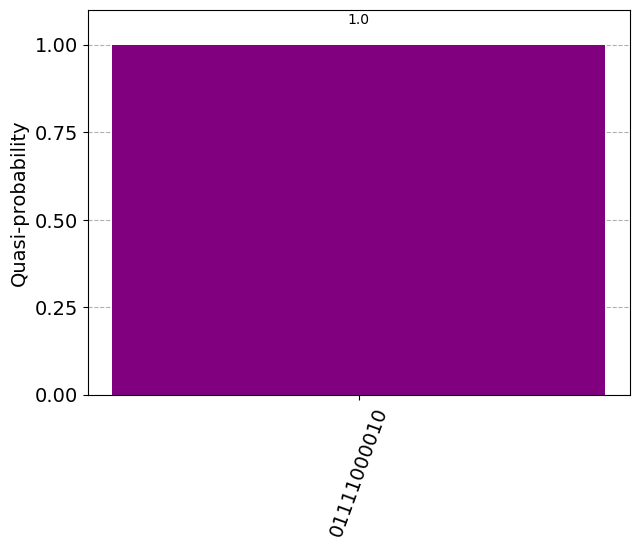

In [10]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = simulator, shots = 1).result().get_counts() # 1 shot is enough to get the result!

plot_distribution(counts, color = 'purple')

The result is the state containing the hidden string. We can see that the algorithm has worked, all in one shot. Feel free to test this with any binary string you want.